In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

###Link for the dataset : https://drive.google.com/file/d/1GwiMVAJGDRpm7KuaZIamG0E9OKdRuefJ/view?usp=share_link

In [134]:
df = pd.read_csv('/content/sample_data/Global_terrorism.csv', encoding='ISO-8859-1')

<ipython-input-134-160580e67049>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/Global_terrorism.csv', encoding='ISO-8859-1')


In [135]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [136]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [137]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### getting important columns from data set

In [138]:
df = df[['iyear','country_txt','provstate','city','success', 'region_txt','attacktype1_txt','target1','nkill','nwound','weaptype1_txt','targtype1_txt','gname']]
df.head()

,iyear,country_txt,provstate,city,success,region_txt,attacktype1_txt,target1,nkill,nwound,weaptype1_txt,targtype1_txt,gname
0,1970,Dominican Republic,NaN,Santo Domingo,1,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,Unknown,Private Citizens & Property,MANO-D
1,1970,Mexico,Federal,Mexico city,1,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,Unknown,Government (Diplomatic),23rd of September Communist League
2,1970,Philippines,Tarlac,Unknown,1,Southeast Asia,Assassination,Employee,1.0,0.0,Unknown,Journalists & Media,Unknown
3,1970,Greece,Attica,Athens,1,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,Explosives,Government (Diplomatic),Unknown
4,1970,Japan,Fukouka,Fukouka,1,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,Incendiary,Government (Diplomatic),Unknown


In [139]:
# identifying null values in dataset
df.isnull().sum()

iyear                  0
country_txt            0
provstate            421
city                 434
success                0
region_txt             0
attacktype1_txt        0
target1              636
nkill              10313
nwound             16311
weaptype1_txt          0
targtype1_txt          0
gname                  0
dtype: int64

### since there is no data for provstate, city, target, 
### lets call them NoData 

In [140]:
df['provstate'] = df['provstate'].fillna('NoData')
df['city'] = df['city'].fillna('NoData')
df['target1'] = df['target1'].fillna('NoData')

df['nkill'].fillna(df['nkill'].median(), inplace = True)
df['nwound'].fillna(df['nwound'].median(), inplace= True)

In [141]:
df.value_counts()

iyear  country_txt  provstate        city           success  region_txt                  attacktype1_txt                      target1                                        nkill  nwound  weaptype1_txt  targtype1_txt                gname                                      
2017   Iraq         Nineveh          Mosul          0        Middle East & North Africa  Bombing/Explosion                    Unknown                                        0.0    0.0     Explosives     Unknown                      Unknown                                        101
2016   Iraq         Saladin          Dawr district  1        Middle East & North Africa  Bombing/Explosion                    House                                          0.0    0.0     Explosives     Private Citizens & Property  Islamic State of Iraq and the Levant (ISIL)    100
                    Al Anbar         Albu Bali      1        Middle East & North Africa  Bombing/Explosion                    Power Pylon                     

In [142]:
df['country_txt'].value_counts().head(15)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country_txt, dtype: int64

In [143]:
df['region_txt'].value_counts().head(15)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [144]:
df['provstate'].value_counts().head(15)


Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Name: provstate, dtype: int64

In [145]:
df['target1'].value_counts().head(15)

Civilians         6461
Unknown           5918
Soldiers          3157
Patrol            2942
Checkpoint        2905
Vehicle           2785
Officers          1787
Village           1679
Military Unit     1533
Bus               1335
Convoy            1262
Unit              1195
Market            1194
Police Station    1190
Base               885
Name: target1, dtype: int64

In [146]:
df['attacktype1_txt'].value_counts().head(15)


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [147]:
df['gname'].value_counts().head(15)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: gname, dtype: int64

In [148]:
df['weaptype1_txt'].value_counts().head(15)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

###Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

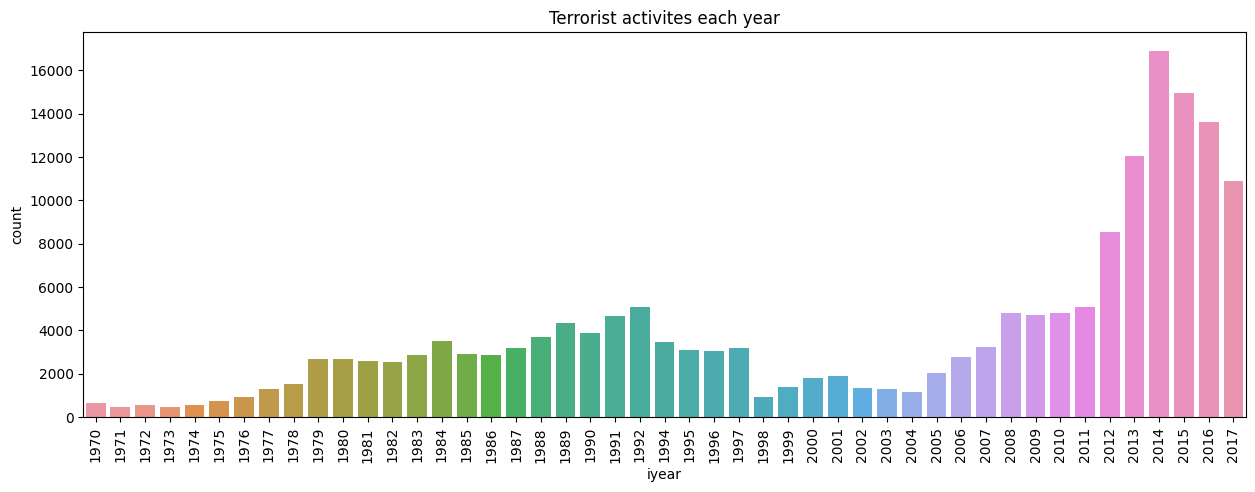

In [149]:
#terroristic activities in each year
plt.figure(figsize = (15,5))
sns.countplot(x='iyear',data=df)
plt.xticks(rotation=90)
plt.title('Terrorist activites each year')
plt.show

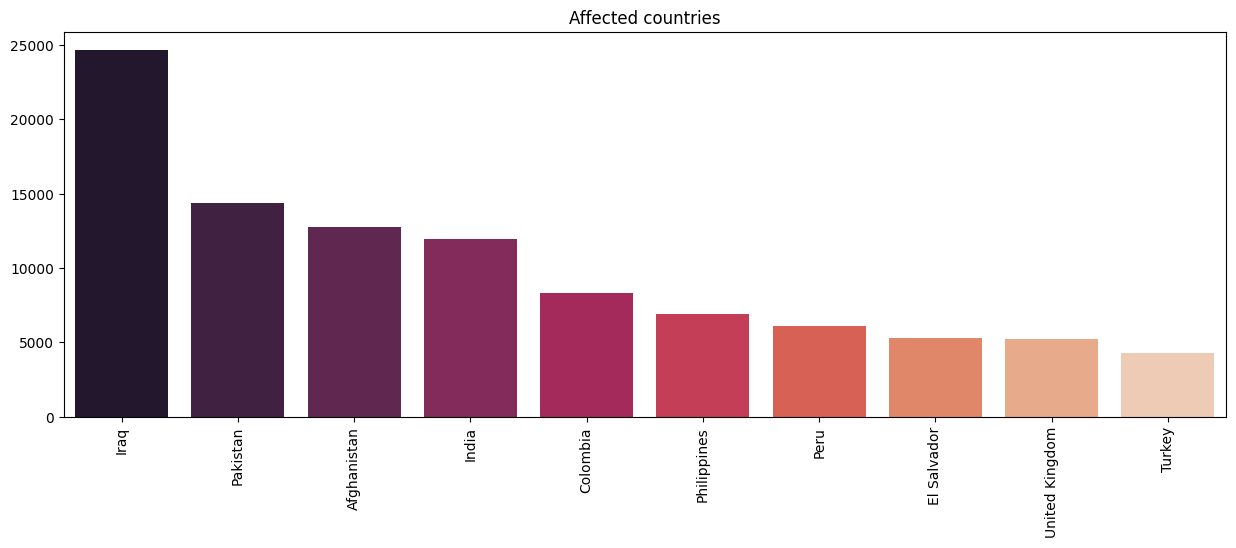

In [150]:
#terroristic activities affected countries
plt.figure(figsize = (15,5))
sns.barplot(x=df['country_txt'].value_counts()[:10].index,y = df['country_txt'].value_counts()[:10].values, palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Affected countries')
plt.show()

### we can see that Iraq is the most affected country of all time.

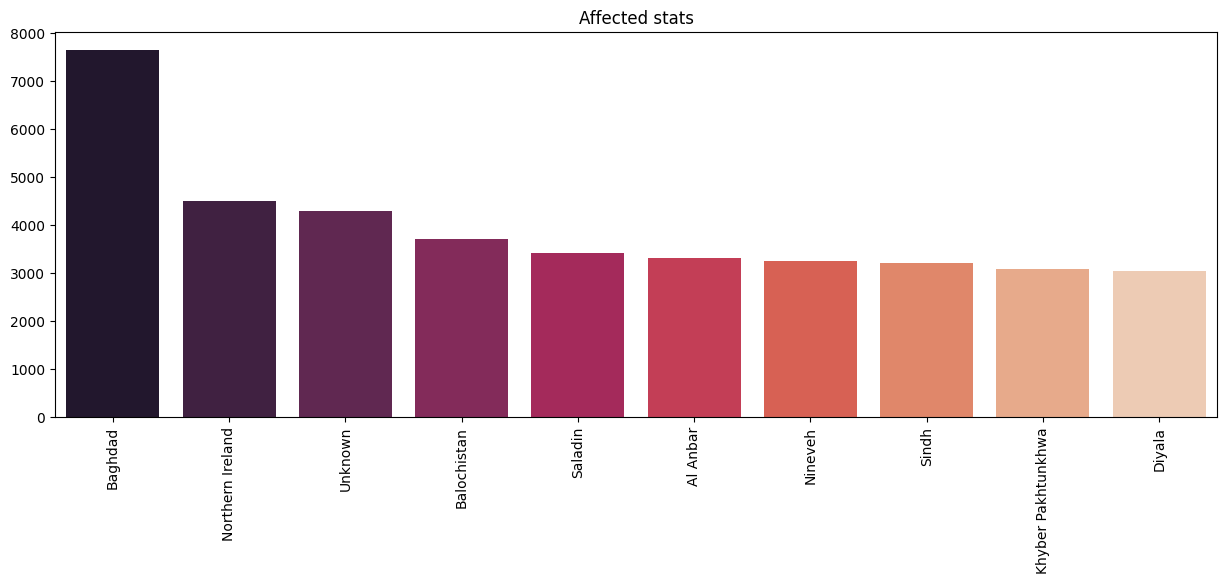

In [151]:
###Affected regions
plt.figure(figsize = (15,5))
sns.barplot(x=df['provstate'].value_counts()[:10].index,y = df['provstate'].value_counts()[:10].values, palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Affected stats')
plt.show()

### Baghdad is the most affected state, Northern Ireland comes second

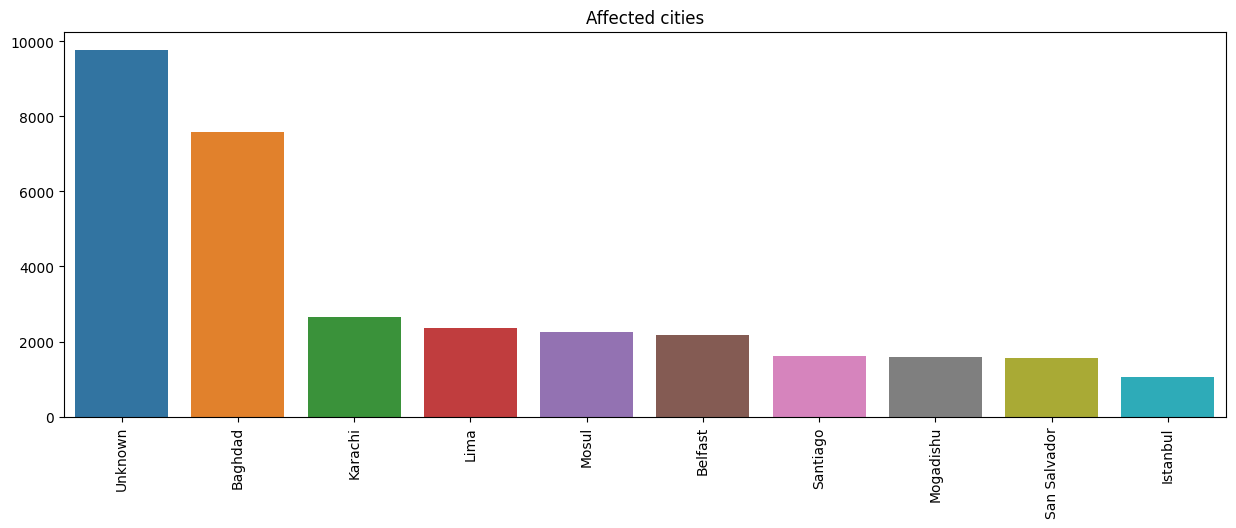

In [152]:
###Affected city
plt.figure(figsize = (15,5))
sns.barplot(x=df['city'].value_counts()[:10].index,y = df['city'].value_counts()[:10].values)
plt.xticks(rotation=90)
plt.title('Affected cities')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

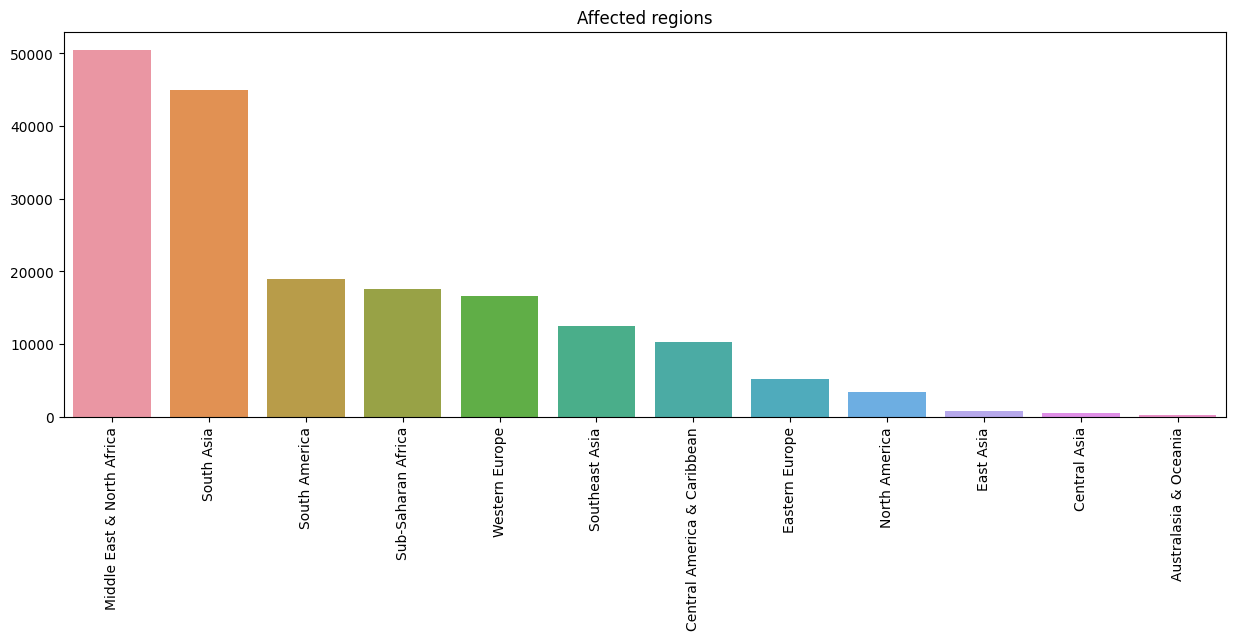

In [153]:
###Affected regions
plt.figure(figsize = (15,5))
sns.barplot(x = df['region_txt'].value_counts().index, y = df['region_txt'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Affected regions')
plt.show

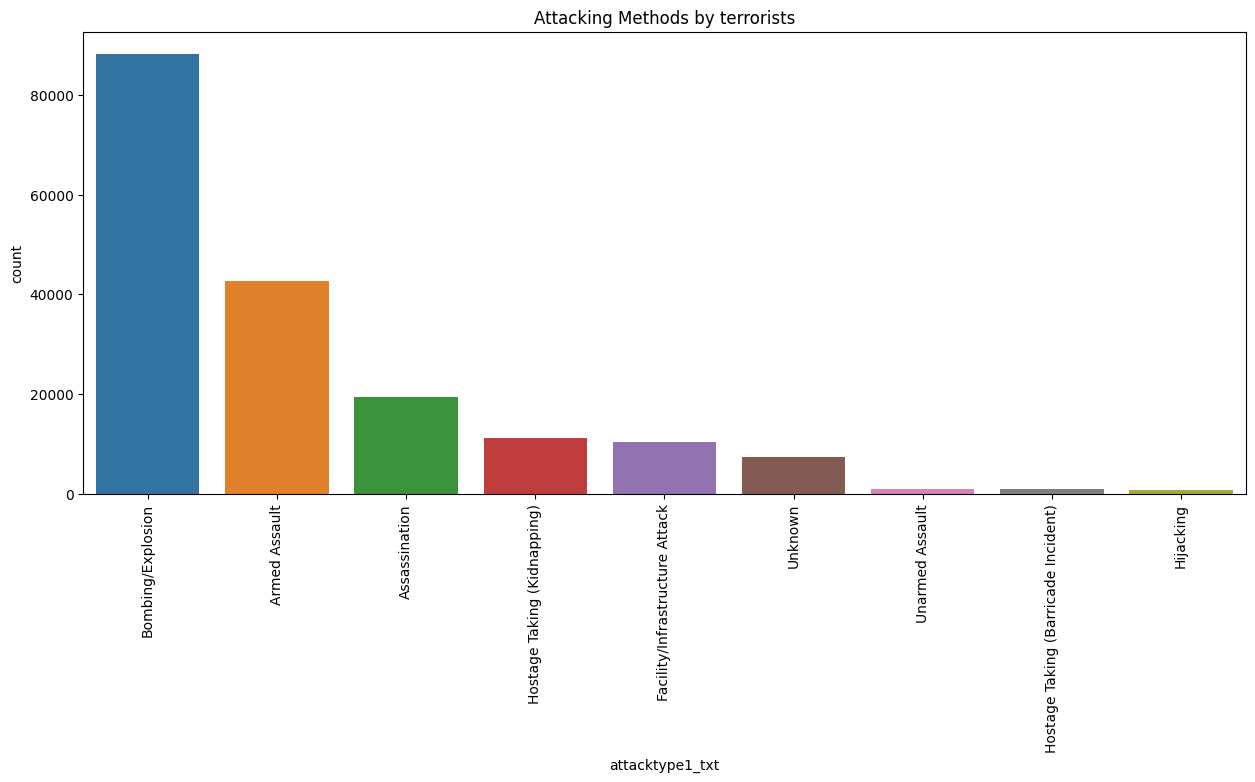

In [154]:
###Attacking methods
plt.subplots(figsize=(15,6))
sns.countplot(x='attacktype1_txt',data=df,order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by terrorists')
plt.show()

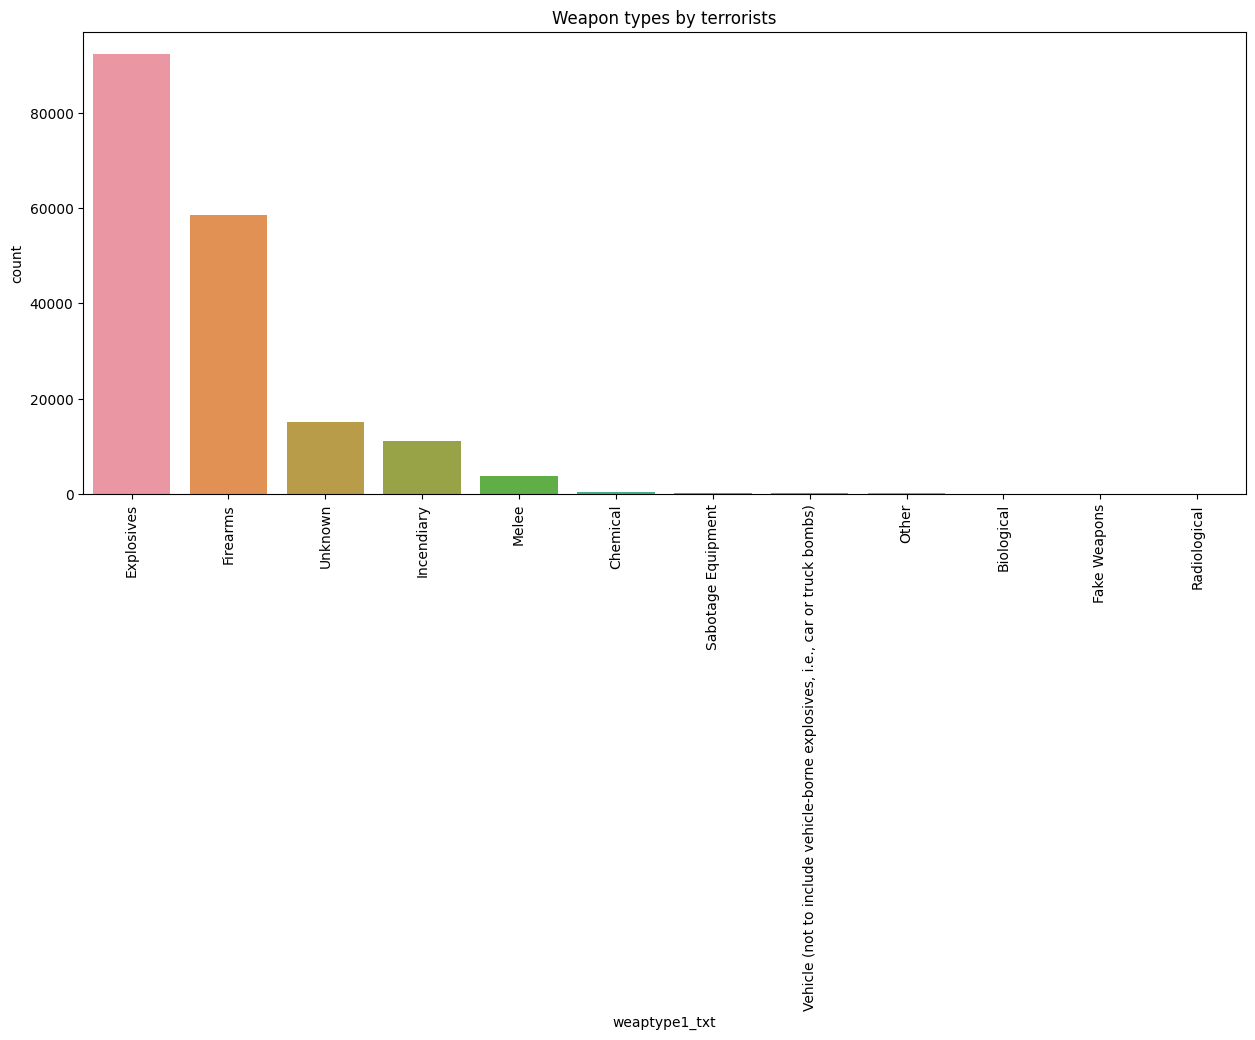

In [155]:
plt.subplots(figsize=(15,6))
sns.countplot(x='weaptype1_txt',data=df,order=df['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Weapon types by terrorists')
plt.show()

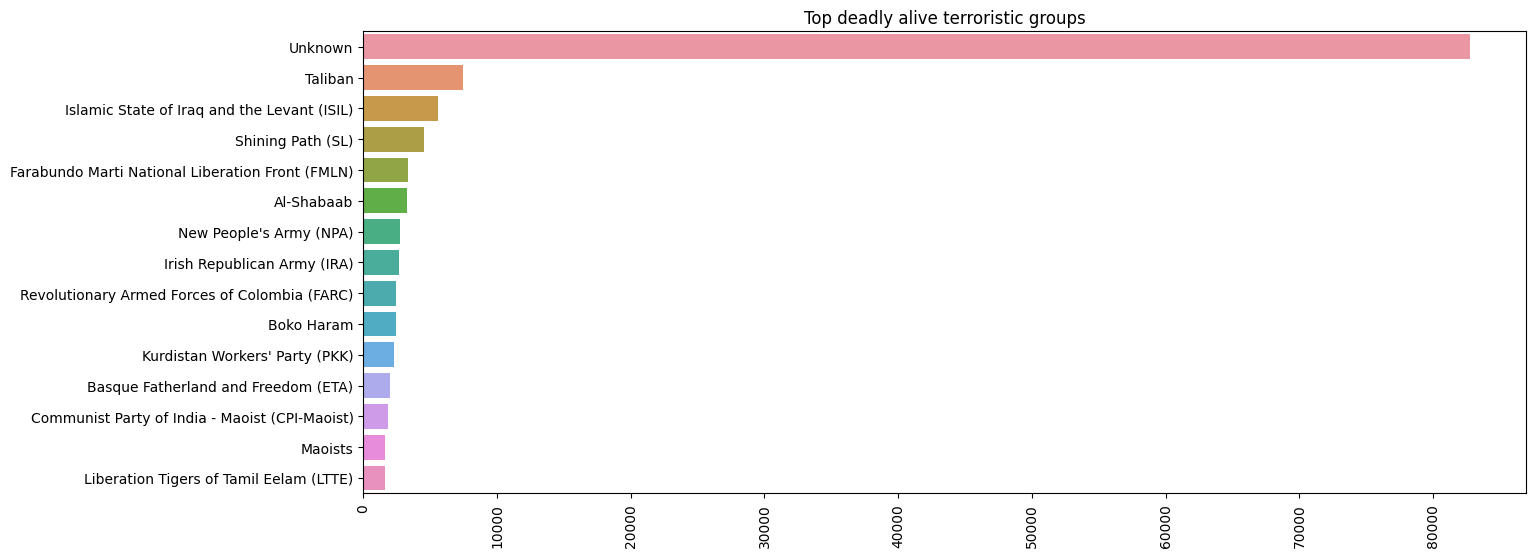

In [156]:
### Top alive terrorists
plt.subplots(figsize=(15,6))
sns.barplot(x=df['gname'].value_counts()[:15].values,y=df['gname'].value_counts()[:15].index)
plt.xticks(rotation=90)
plt.title('Top deadly alive terroristic groups')
plt.show()

### **In Conclusion, we can say that**

##Most terroristic acts happened last 10 years. 
##The most affected countries are Iraq, Pakistan , Afghanistan in order.
##The most deadly affected states are Baghdad, Northern Ireland, and Balochistan.
##Middle East and North Africa, South Asia, South America are places where most terroristic acts occurred.
##Terrorists most attacked Bombing and explosion and armed assault during  act.

##They use mostly explosives, firearms, incendiary. 
##Deadly and alive terror groups are Taliban, ISIL, SL, FMLN